## Prerequisite

In [6]:
import matplotlib.pyplot
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

import pandas as pd

In [118]:
taus = np.zeros((3,2))
taus[0] = np.array([50,100])
taus[1] = np.array([50,100])
taus[2] = np.array([50,100])
Bsims= np.array([100])
alphas= np.array([0.03])
samps = 100

In [119]:
glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/algo_mig_old/hetero*')

['/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/algo_mig_old/hetero_Nb75_migr0.25+_tau500_alpha0.03_ID26_demes200_2021-02-01-22-28-16.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/algo_mig_old/hetero_Nb50_migr0.25+_tau100_alpha0.005_ID22_demes200_2021-02-03-03-54-25.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/algo_mig_old/hetero_Nb100_migr0.25+_tau500_alpha0.01_ID84_demes200_2021-02-02-23-17-37.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/algo_mig_old/hetero_Nb100_migr0.25+_tau500_alpha0.03_ID31_demes200_2021-02-01-19-20-49.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/algo_mig_old/hetero_Nb100_migr0.25+_tau100_alpha0.03_ID11_demes200_2021-02-01-19-02-33.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/algo_mig_old/hetero_Nb100_migr0.25+_tau100_alpha0.01_ID37_demes200_2021-02-02-23-06-07.txt',
 '/Users/nikhilkrishnan/Dropbox/Res

In [120]:
harr = np.zeros((len(Bsims),len(taus[0]),len(alphas), samps,100000 ))
for a, alpha in enumerate(alphas):
    for t, tau in enumerate(taus[a].astype(int)):
        for B, Bsim in enumerate(Bsims):
            for a, alpha in enumerate(alphas):
                for ID in range(1,samps+1):
                    try:
                        hetf = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/hetero*Nb'+str(Bsim)+'*tau'+str(tau)+'_alpha'+str(alpha)+'_*ID'+str(ID)+'*')
                        arr = np.loadtxt(hetf[0])[:,1]
                        harr[B,t,a,ID-1,:len(arr)]=arr
                    except:
                        print(tau,Bsim,alpha,ID)
                        
        

In [14]:
hetf = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/hetero*Nb'+str(Bsim)+'*tau'+str(tau)+'_*ID'+str(ID)+'*')
hx_arr= np.loadtxt(hetf[0])[:,0]

<ipython-input-122-74060c4846b3>:15: RuntimeWarning: divide by zero encountered in log
  y=np.mean(np.log(harr[0,i,0,:,:tf]),axis=0)
<ipython-input-122-74060c4846b3>:15: RuntimeWarning: divide by zero encountered in log
  y=np.mean(np.log(harr[0,i,0,:,:tf]),axis=0)


Text(0.5, 0, 'Time (time steps)')

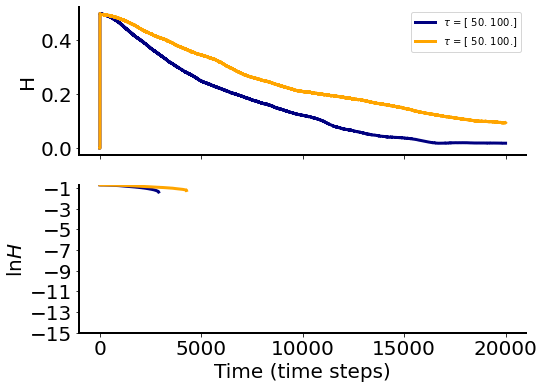

In [122]:
fig,axs = plt.subplots(2,1,figsize=(8,6),sharex=True)
colors = ['navy', 'orange', 'purple', 'maroon','grey']
ax=axs[0]
tf=20000
for i in range(2):
    #ax.plot(np.mean(harr[0,i,:,:300],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
    ax.plot(np.arange(0,tf*1,1),np.mean(harr[0,i,0,:,:tf],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
    #ax.plot(np.mean(harr[1,i,1,:,:5\300],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
ax.legend()
ax.set_ylabel('H',fontsize=20)
ax=axs[1]

for i in range(2):
    #ax.plot(np.mean(harr[0,i,:,:300],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
    y=np.mean(np.log(harr[0,i,0,:,:tf]),axis=0)
    ax.plot(np.arange(0,tf*1,1)[:len(y)],y,lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
    #ax.plot(np.mean(harr[1,i,1,:,:5\300],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
    ax.set_yticks(np.arange(-15,0,2))
    
for ax in axs:

    for axis in ['left','bottom']:
        ax.spines[axis].set_linewidth(2)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    #ax.legend()
ax.set_ylabel('$\ln H$',fontsize=20)
ax.set_xlabel('Time (time steps)',fontsize=20)

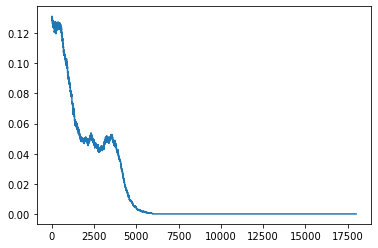

In [134]:
plt.plot(np.mean(harr[0,0,0,:,12000:30000][::20],axis=0))

<ipython-input-40-729a3775a638>:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log((np.mean(harr[0,1,0,:,:],axis=0))))


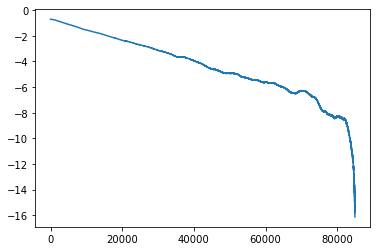

In [40]:
#plt.plot((np.mean(harr[0,i,0,:,:tf],axis=0))+(np.std(harr[0,i,0,:,:tf],axis=0)))
plt.plot(np.log((np.mean(harr[0,1,0,:,:],axis=0))))
np.
#plt.plot((np.mean(harr[0,i,0,:,:tf],axis=0))-(np.std(harr[0,i,0,:,:tf],axis=0)))

<ipython-input-63-e7e3e6ce2c74>:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.mean(np.log(harr[0,3,1,:,:5000]),axis=0))


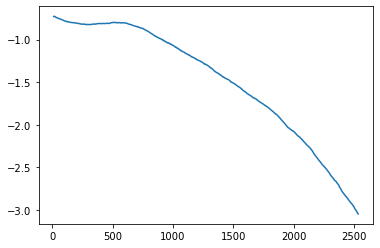

In [63]:
plt.plot(np.mean(np.log(harr[0,3,1,:,:5000]),axis=0))

<ipython-input-65-c051cab07117>:6: RuntimeWarning: divide by zero encountered in log
  y=np.mean(np.log(harr[0,3,1,:,:10000]),axis=0)


Text(0.5, 0, 'Time (time steps)')

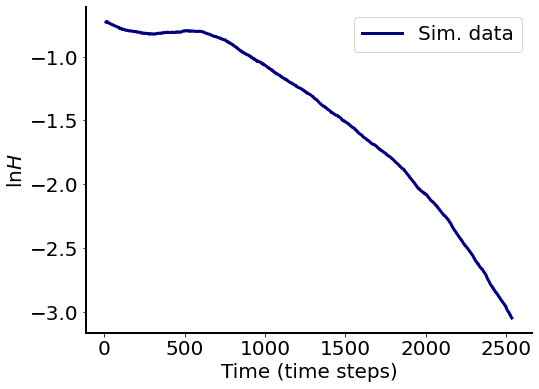

In [65]:
fig,ax = plt.subplots(1,figsize=(8,6),sharex=True)
colors = ['navy', 'orange', 'purple', 'maroon','grey']


    #ax.plot(np.mean(harr[0,i,:,:300],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
y=np.mean(np.log(harr[0,3,1,:,:10000]),axis=0)
x=np.arange(0,10000*1,1)[:len(y)]
ax.plot(x,y,lw=3,c = colors[0],label=r'Sim. data')
ax.legend()

for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.legend(fontsize=20)
ax.set_ylabel('$\lnH$',fontsize=20)
ax.set_xlabel('Time (time steps)',fontsize=20)

<ipython-input-62-fd9d5d483e2b>:6: RuntimeWarning: divide by zero encountered in log
  y=np.mean(np.log(harr[0,2,1,:,:10000]),axis=0)


Text(0.5, 0, 'Time (time steps)')

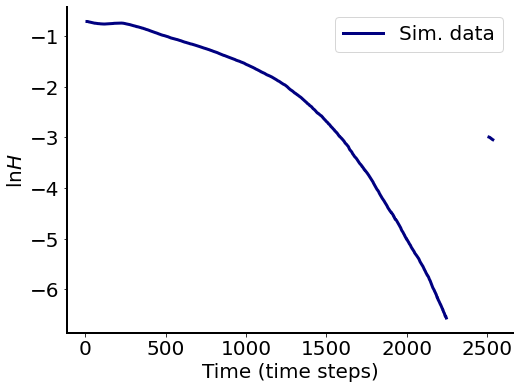

In [62]:
fig,ax = plt.subplots(1,figsize=(8,6),sharex=True)
colors = ['navy', 'orange', 'purple', 'maroon','grey']


    #ax.plot(np.mean(harr[0,i,:,:300],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
y=np.mean(np.log(harr[0,2,1,:,:10000]),axis=0)
x=np.arange(0,10000*1,1)[:len(y)]
ax.plot(x,y,lw=3,c = colors[0],label=r'Sim. data')
    #ax.plot(np.mean(harr[1,i,1,:,:5\300],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
ax.legend()

for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

hts=np.log(0.1)
htf=np.log(0.01)
ts=np.argwhere(y>hts)[-1][0]+5
#tf=np.argwhere(y>htf)[-1][0]
tf=np.argwhere(~np.isinf(y))[-1][0]
htf=y[tf]
#ax.scatter(x[ts],hts,marker='|',s=350,c='k')
#ax.scatter(x[tf],htf,marker='|',s=350,c='k')
#ax.text(x[ts]+40,hts,s='$t_s$',fontsize=16)
#ax.text(x[tf]+40,htf,s='$t_f$',fontsize=16)
tt=ts+int((tf-ts)/2)
#ax.text(x[tt]+40,y[tt] ,s='$\ln H=-\Lambda t + \mathrm{const.} $',fontsize=16)
lam,c =np.polyfit(x[ts:tf],y[ts:tf],1)
#plt.plot(x[ts:tf],lam*x[ts:tf]+c,c='k',linestyle='--',lw=3,label= "$\ln H=-\Lambda t + \mathrm{const.} $")
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.legend(fontsize=20)
ax.set_ylabel('$\lnH$',fontsize=20)
ax.set_xlabel('Time (time steps)',fontsize=20)

IndexError: index 1 is out of bounds for axis 2 with size 1

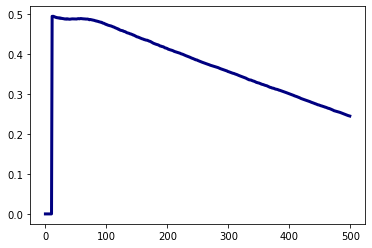

In [850]:
fig,ax = plt.subplots()
colors = ['navy', 'orange', 'purple', 'maroon','grey']
for i in range(4):
    #ax.plot(np.mean(harr[0,i,:,:500],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
    ax.plot(np.mean(harr[1,i,0,:,:500],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
    ax.plot(np.mean(harr[1,i,1,:,:500],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))



for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Time (time steps)',fontsize=20)
ax.set_ylabel('H',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.legend()

In [69]:
data= np.zeros((len(Bsims),len(taus[0]),len(alphas)))
tss = np.array([0.1,0.1,0.1,0.1])

for B, Bsim in enumerate(Bsims):
    for a, alpha in enumerate(alphas):
        for t, tau in enumerate(taus[a]):
            #for n in rannge(samp):
            het = np.mean(np.log(harr[B,t,a,:,:]),axis=0)
            try:
                ts = np.argwhere(het>np.log(tss[t]))[-1][0]
            except:
                ts=0
            try:
                tf =np.argwhere(~np.isinf(het))[-1][0]
            except:
                tf=len(het)
            data[B,t,a] = -np.polyfit(np.arange(len(het[ts:tf])),het[ts:tf],1)[0]
            print(Bsim,tau,alpha,ts,tf,data[B,t,a])


            

<ipython-input-69-33d5c175447c>:8: RuntimeWarning: divide by zero encountered in log
  het = np.mean(np.log(harr[B,t,a,:,:]),axis=0)


25 100.0 0.005 0 100000 nan
25 200.0 0.005 0 100000 nan
25 500.0 0.005 0 100000 nan
25 800.0 0.005 0 100000 nan
25 50.0 0.01 735 1130 0.011883534070050954
25 100.0 0.01 1000 1656 0.008287256668524177
25 200.0 0.01 1371 2534 nan
25 500.0 0.01 2151 2534 0.0019129615838128285
25 50.0 0.03 748 1156 0.011745359448066922
25 100.0 0.03 1006 1589 0.007389036835262135
25 200.0 0.03 1389 2550 nan
25 500.0 0.03 2186 2550 0.001962372701636595
50 100.0 0.005 969 1647 0.008740868237280324
50 200.0 0.005 969 1647 0.008740868237280324
50 500.0 0.005 1317 2631 nan
50 800.0 0.005 2039 3256 0.0011543100696171985
50 50.0 0.01 737 1206 0.013210187446444319
50 100.0 0.01 970 1652 0.008327500135235595
50 200.0 0.01 1339 2570 nan
50 500.0 0.01 2081 2570 0.002074554665220391
50 50.0 0.03 755 1178 0.011401730352548461
50 100.0 0.03 993 1661 0.007822785329912797
50 200.0 0.03 1355 2622 nan
50 500.0 0.03 2096 2622 0.0019690336399893872
75 100.0 0.005 959 1637 0.008471104141773126
75 200.0 0.005 959 1637 0.0084711

In [70]:
a

2

In [30]:
plt.plot(np.mean(np.log(harr[2,4,0,:,:]),axis=0))

het = np.mean(np.log(harr[3,4,0,:,:]),axis=0)

ts = np.argwhere(het>np.log(.1))[-1][0]
tf =np.argwhere(~np.isinf(het))[-1][0]





IndexError: index 4 is out of bounds for axis 1 with size 3

In [31]:
ts

1371

In [32]:
plt.plot(np.log(np.mean(harr[0,3,0],axis=0))[2426:2709])

IndexError: index 3 is out of bounds for axis 1 with size 3

ValueError: x and y must be the same size

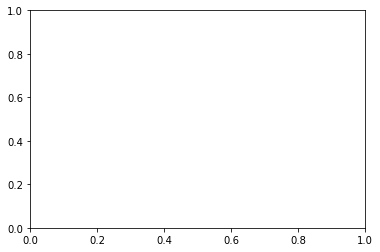

In [45]:
fig,ax=plt.subplots()
colormap = plt.cm.viridis #or any other colormap
lmax=1/np.min(data)
lmin=1/np.max(data)
normalize = matplotlib.colors.Normalize(vmin=lmin, vmax=lmax)

for t, tau in enumerate(taus):
    for B, Bsim in enumerate(Bsims):
        #im= plt.scatter(Bsim/150,(tau*.01/Bsim)*150, c = 1/data[B,t,0],cmap=colormap,norm=normalize)
        im= ax.scatter(Bsim,(tau), c = 1/data[B,t,0],cmap=colormap,norm=normalize,s=100)
        im= ax.scatter(Bsim,(tau), c = 1/data[B,t,0],cmap=colormap,norm=normalize,s=100)


ax.grid()

for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel(r'$B_0$',fontsize=20)
ax.set_ylabel(r'$ \tau$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


cbaxes = fig.add_axes([1, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(im, cax = cbaxes) 
cbaxes.set_ylabel('$1/\Lambda$ ',fontsize=20)
#y_ticks=np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)
#y_ticklabes= np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)/10000
#cbaxes.set_yticks([5000,10000,15000,20000,25000],fontsize=20)
#cb.set_ticks(y_ticks)
#cbaxes.set_yticklabels([str(n) for n in y_ticklabes[:-1]]+[str(y_ticklabes[-1])+r"$\times 10^4 $"],fontsize=20)

ValueError: x and y must be the same size

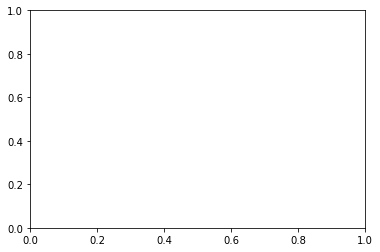

In [34]:
fig,ax=plt.subplots()
colormap = plt.cm.viridis #or any other colormap
lmax=1/np.min(data)
lmin=1/np.max(data)
normalize = matplotlib.colors.Normalize(vmin=lmin, vmax=lmax)

for t, tau in enumerate(taus):
    for B, Bsim in enumerate(Bsims):
        im= plt.scatter(Bsim,(tau*.01/Bsim), c = 1/data[B,t,0],cmap=colormap,norm=normalize,s=100)
        im= ax.scatter(Bsim,(tau*.03/Bsim), c = 1/data[B,t,1],cmap=colormap,norm=normalize,s=100)


ax.grid()

for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel(r'$B_0$',fontsize=20)
ax.set_ylabel(r'$\alpha \tau$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


cbaxes = fig.add_axes([1, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(im, cax = cbaxes) 
cbaxes.set_ylabel('$1/\Lambda$ ',fontsize=20)
#y_ticks=np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)
#y_ticklabes= np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)/10000
#cbaxes.set_yticks([5000,10000,15000,20000,25000],fontsize=20)
#cb.set_ticks(y_ticks)
#cbaxes.set_yticklabels([str(n) for n in y_ticklabes[:-1]]+[str(y_ticklabes[-1])+r"$\times 10^4 $"],fontsize=20)

ValueError: x and y must be the same size

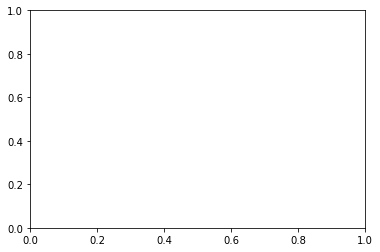

In [35]:
fig,ax=plt.subplots()
colormap = plt.cm.viridis #or any other colormap
lmax=1/np.min(data)
lmin=1/np.max(data)
normalize = matplotlib.colors.Normalize(vmin=lmin, vmax=lmax)

for t, tau in enumerate(taus):
    for B, Bsim in enumerate(Bsims):
        im= plt.scatter(Bsim,(tau*.01/Bsim), c = 1/data[B,t,0],cmap=colormap,norm=normalize,s=100)
        #im= ax.scatter(Bsim,(tau*.03/Bsim), c = 1/data[B,t,1],cmap=colormap,norm=normalize,s=100)


ax.grid()

for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel(r'$B_0$',fontsize=20)
ax.set_ylabel(r'$\alpha \tau$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


cbaxes = fig.add_axes([1, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(im, cax = cbaxes) 
cbaxes.set_ylabel('$1/\Lambda$ ',fontsize=20)
#y_ticks=np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)
#y_ticklabes= np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)/10000
#cbaxes.set_yticks([5000,10000,15000,20000,25000],fontsize=20)
#cb.set_ticks(y_ticks)
#cbaxes.set_yticklabels([str(n) for n in y_ticklabes[:-1]]+[str(y_ticklabes[-1])+r"$\times 10^4 $"],fontsize=20)

ValueError: x and y must be the same size

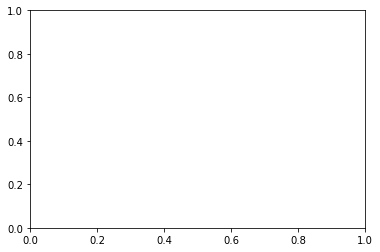

In [36]:
fig,ax=plt.subplots()
colormap = plt.cm.viridis #or any other colormap
lmax=1/np.min(data)
lmin=1/np.max(data)
normalize = matplotlib.colors.Normalize(vmin=lmin, vmax=lmax)

for t, tau in enumerate(taus):
    for B, Bsim in enumerate(Bsims):
        im= plt.scatter(Bsim,(tau*.01/Bsim), c = 1/data[B,t,0],cmap=colormap,norm=normalize,s=100)
        im= ax.scatter(Bsim,(tau*.03/Bsim), c = 1/data[B,t,1],cmap=colormap,norm=normalize,s=100)


ax.grid()

for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel(r'$B_0$',fontsize=20)
ax.set_ylabel(r'$\alpha \tau$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


cbaxes = fig.add_axes([1, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(im, cax = cbaxes) 
cbaxes.set_ylabel('$1/\Lambda$ ',fontsize=20)
#y_ticks=np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)
#y_ticklabes= np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)/10000
#cbaxes.set_yticks([5000,10000,15000,20000,25000],fontsize=20)
#cb.set_ticks(y_ticks)
#cbaxes.set_yticklabels([str(n) for n in y_ticklabes[:-1]]+[str(y_ticklabes[-1])+r"$\times 10^4 $"],fontsize=20)

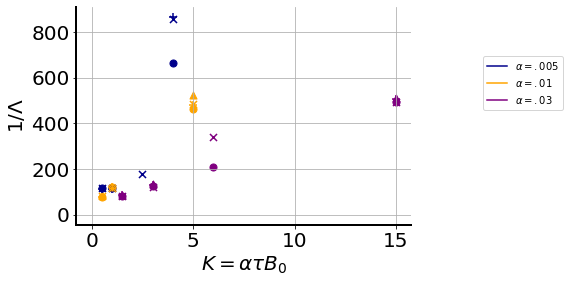

In [79]:
fig,ax=plt.subplots()
markers=["^","+","o","x"]




ax.plot(0,0,c='darkblue',label= r'$\alpha = .005$')
ax.plot(0,0,c='orange',label= r'$\alpha = .01$')
ax.plot(0,0,c='purple',label= r'$\alpha = .03$')
for t in range(4):
    for B, Bsim in enumerate(Bsims):
        #im= plt.scatter(Bsim,(tau*.01/Bsim), c = 1/data[B,t,0],cmap=colormap,norm=normalize,s=100)
        ax.scatter(taus[0][t]*0.005,1/data[B,t,0],cmap=colormap,norm=normalize,s=50,marker=markers[B],c='darkblue')
        ax.scatter(taus[2][t]*0.03,1/data[B,t,2],cmap=colormap,norm=normalize,s=50,marker=markers[B],c='purple')
        ax.scatter(taus[1][t]*0.01,1/data[B,t,1],cmap=colormap,norm=normalize,s=50,marker=markers[B],c='orange')
        #plt.scatter(tau*Bsim*.01,1/data[B,t,1],cmap=colormap,norm=normalize,s=100)
        
        
        
ax.plot()
ax.grid()
ax.legend(bbox_to_anchor=(1.2,.8))

for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel(r'$K = \alpha \tau B_0$',fontsize=20)
ax.set_ylabel(r'$1/ \Lambda$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


In [105]:
(50*.03)/.01

150.0

In [108]:
for alpha in alphas:
    print(np.linspace((50*.03)/alpha,(200*.03)/alpha,5))

[ 300.  525.  750.  975. 1200.]
[150.  262.5 375.  487.5 600. ]
[ 50.   87.5 125.  162.5 200. ]


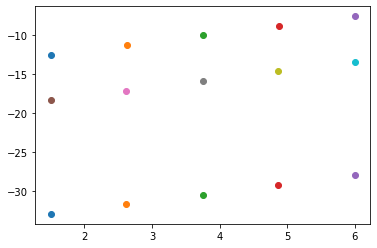

In [115]:
taus1 = np.array([180,500,780,1200])
taus2 = np.array([90,250,450,600])
taus3 = np.array([50,80,140,200])
taus=np.zeros((3,5))
aBt_0 = 50*.03
aBt_f =200*.03
for a,alpha in enumerate(alphas):
    taus[a] = np.linspace((aBt_0)/alpha,(aBt_f)/alpha,5)
taus=taus.astype(int)
Bsims= np.array([100])
alphas= np.array([.005,.01,0.03])
for a,alpha in enumerate(alphas):
    for tau in taus[a]:
        plt.scatter(tau*alpha, tau*alpha*1.1-200*alpha**.5)

In [113]:
taus=taus.astype(int)

In [114]:
taus

array([[ 300,  525,  750,  975, 1200],
       [ 150,  262,  375,  487,  600],
       [  50,   87,  125,  162,  200]])